Loading the data frame using pandas

In [30]:
import pandas as pd
import numpy as np
data = pd.read_csv("slr.csv")
data.head()

,chirps per second,temperature (F)
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


Ploting data point in a scatter plot

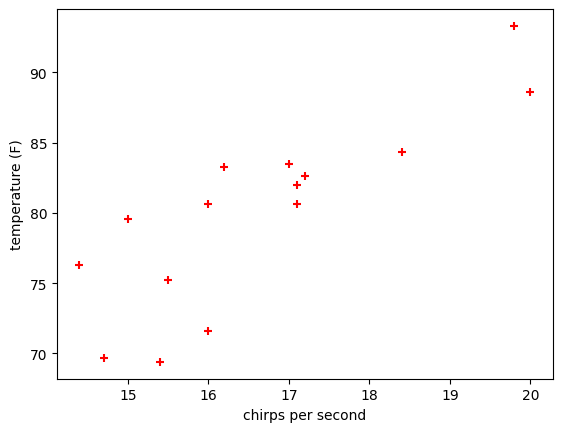

In [46]:
import matplotlib.pyplot as plt

plt.xlabel('chirps per second')
plt.ylabel('temperature (F)')
plt.scatter(data['chirps per second'], data['temperature (F)'], color='red', marker='+')

Define our historical input feature X : the chirps per second and the output feature y: temperature (F) in pandas

Initializing the dependet variable and independent variable

In [3]:
X = data[['chirps per second']]
y = data[['temperature (F)']]

Partitioning the historical data into a train set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)
print('Whole Data shape', data.shape)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

Whole Data shape (15, 2)
X_train shape (11, 1)
X_test shape (4, 1)


Inatiating the model (SLR model) and fitting the model to training data

In [9]:
from sklearn.linear_model import LinearRegression
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

LinearRegression()

Initializing the SLR parameters

In [10]:
slope = slr_model.coef_
y_intercept = slr_model.intercept_
print('Slope', slope)
print('Intercept', y_intercept)

Slope [[3.5571068]]
Intercept [20.40500397]


Variable for predictions for training data

In [16]:
y_pred_train = slr_model.predict(X_train)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Training R2 score', r2_train)
print('Training MSE', mse_train)

Training R2 score 0.6962423950559918
Training MSE 13.765094164156034


Variable for predictions for testing data

In [23]:
y_pred_test = slr_model.predict(X_test)

In [24]:
r2_test = r2_score(y_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Testing R2 score', r2_test)
print('Testing MSE', mse_test)

Testing R2 score 1.0
Testing MSE 11.092282161560394


Convert arrays to 1D format using numpy's flatten() method
np.array() ensures the input is a numpy array
flatten() creates a 1D copy of the array, removing any additional dimensions

In [36]:
import numpy as np
y_test_flat = np.array(y_test).flatten()
y_pred_test_flat = np.array(y_pred_test).flatten()

Comparing the actual values of temperature to the predicted values of temperature for the test data

In [37]:
comparision_df = pd.DataFrame({
    'Actual': y_test_flat,
    'Predicted': y_pred_test_flat
})

comparision_df.to_csv(r'/compariosion_df.csv', index = True)
comparision_df

,Actual,Predicted
0,83.300003,78.030137
1,82.599998,81.587244
2,88.599998,91.547140
3,83.500000,80.875820


Ploting the linear regreassion graph

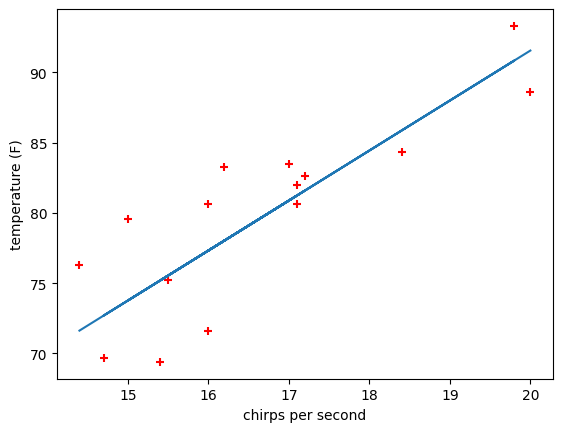

In [51]:
plt.xlabel('chirps per second')
plt.ylabel('temperature (F)')
plt.scatter(data['chirps per second'], data['temperature (F)'], color='red', marker='+')
plt.plot(data['chirps per second'], slr_model.predict(data[['chirps per second']]))